# DATA EXPLORATION

In [2]:
# Import pandas
import pandas as pd

data = pd.read_csv('Data/Train.csv', index_col='id')
# print(data.head())
# print(data.info())
# print(data.describe())
# print(data.dtypes.value_counts())

# Convert data['category'] to a categorical type
data['category'] = data['category'].astype('category')
print(data['category'].dtypes)

category


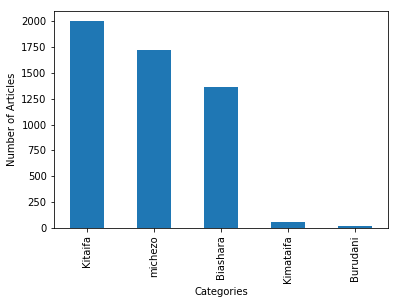

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

data['category'].value_counts().plot(kind='bar')

# Label the axes
plt.xlabel('Categories')
plt.ylabel('Number of Articles')

# Display the plot
plt.show()

# INITIAL PREDICTION

In [44]:
# Import other necessary modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Split out  data
X_train, X_test, y_train, y_test = train_test_split(data['content'],
                                                    pd.get_dummies(data['category']), 
                                                    random_state=300)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='newton-cg')))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.8105590062111802
